In [1]:
# Importing Libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from warnings import filterwarnings
filterwarnings('ignore')

In [2]:
# Loading the dataset
df = pd.read_csv('C:\\Users\\mouni\\OneDrive\\Documents\\Kaggle\\health_insurance.csv')
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [3]:
# Infomration of data in a glance
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


#### Observation: No null values

In [4]:
# Rows and columns of dataframe
df.shape

(1338, 7)

In [5]:
# Datatypes of features
df.dtypes

age           int64
sex          object
bmi         float64
children      int64
smoker       object
region       object
charges     float64
dtype: object

#### Observation: We have categorical features in dataset which needs to be encoded before building the model.

In [6]:
df.describe(include='object')

,sex,smoker,region
count,1338,1338,1338
unique,2,2,4
top,male,no,southeast
freq,676,1064,364


In [7]:
df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [8]:
print('Number of duplicate rows: {}'.format(df.duplicated().sum()))
df = df[~df.duplicated()]
print('Number of rows after removing duplicate rows: ', df.shape[0])

Number of duplicate rows: 1
Number of rows after removing duplicate rows:  1337


In [9]:
### Exploratory Data Analysis
df.columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges'], dtype='object')

In [10]:
## Analysis on age feature
df['age'].nunique()

47

In [11]:
df['age'].describe()

count    1337.000000
mean       39.222139
std        14.044333
min        18.000000
25%        27.000000
50%        39.000000
75%        51.000000
max        64.000000
Name: age, dtype: float64

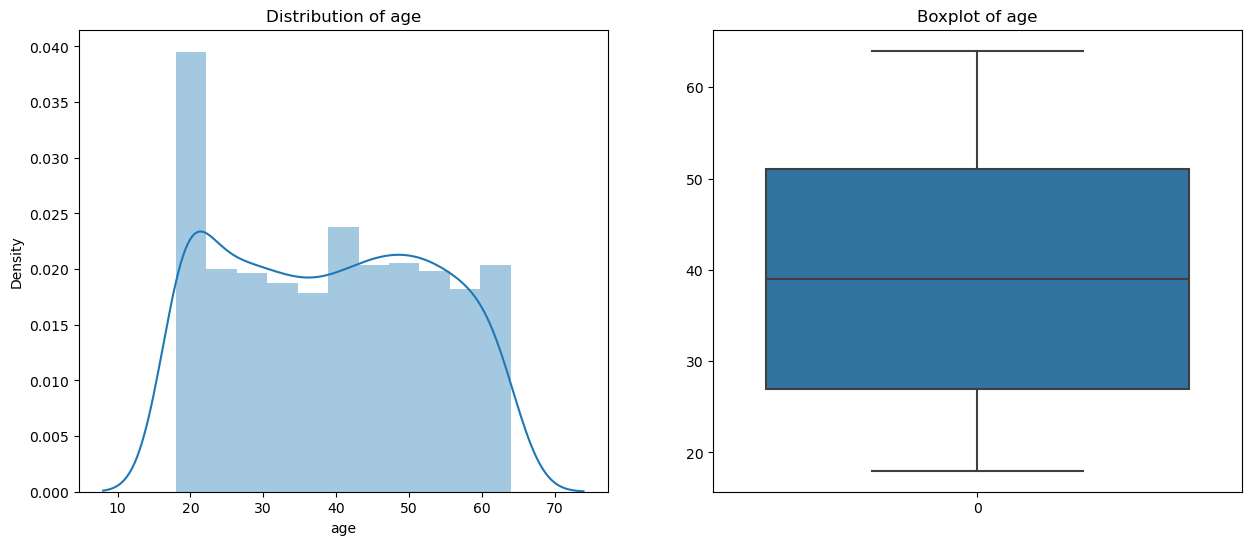

In [12]:
plt.figure(figsize=(15,6))
plt.subplot(1,2,1)
sns.distplot(df['age'])
plt.title('Distribution of age')

plt.subplot(1,2,2)
sns.boxplot(df['age'])
plt.title('Boxplot of age')

plt.show()

In [13]:
## categorizing age as adult, middle-age, upper middle-age and old age.

def age_cat(age):
    if age <= 25:
        return 'adult'
    elif age in range(26, 36):
        return 'middle-age'
    elif age in range(36, 46):
        return 'upper-middle-age'
    else:
        return 'old-age'
    

In [14]:
df['age_cat'] = df['age'].apply(age_cat)
df['age_cat'].head()

0         adult
1         adult
2    middle-age
3    middle-age
4    middle-age
Name: age_cat, dtype: object

In [15]:
df['age_cat'].value_counts()

old-age             500
adult               305
middle-age          268
upper-middle-age    264
Name: age_cat, dtype: int64

<Axes: xlabel='age_cat', ylabel='count'>

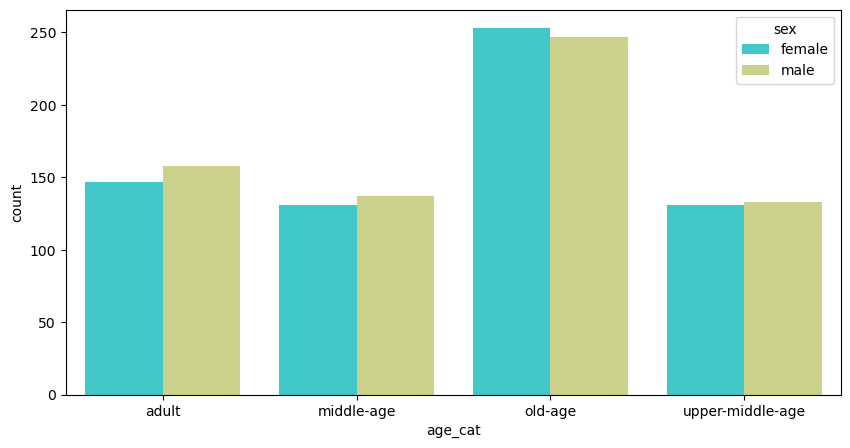

In [16]:
plt.figure(figsize=(10,5))
sns.countplot(x=df['age_cat'], palette='rainbow', hue=df['sex'])

#### Observation: we have more of old-aged patients with almost equal number of male and female

In [17]:
## Analysis of sex feature

df['sex'].value_counts()

male      675
female    662
Name: sex, dtype: int64

#### Observation: almost same/equal number of male and female

<Axes: xlabel='sex', ylabel='count'>

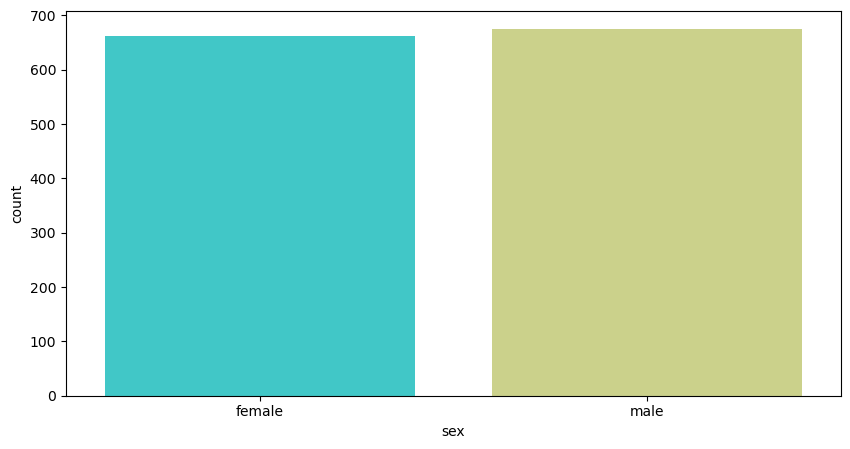

In [18]:
plt.figure(figsize=(10,5))
sns.countplot(x=df['sex'], palette='rainbow')

In [19]:
##Analysis on bmi feature
df['bmi'].describe()

count    1337.000000
mean       30.663452
std         6.100468
min        15.960000
25%        26.290000
50%        30.400000
75%        34.700000
max        53.130000
Name: bmi, dtype: float64

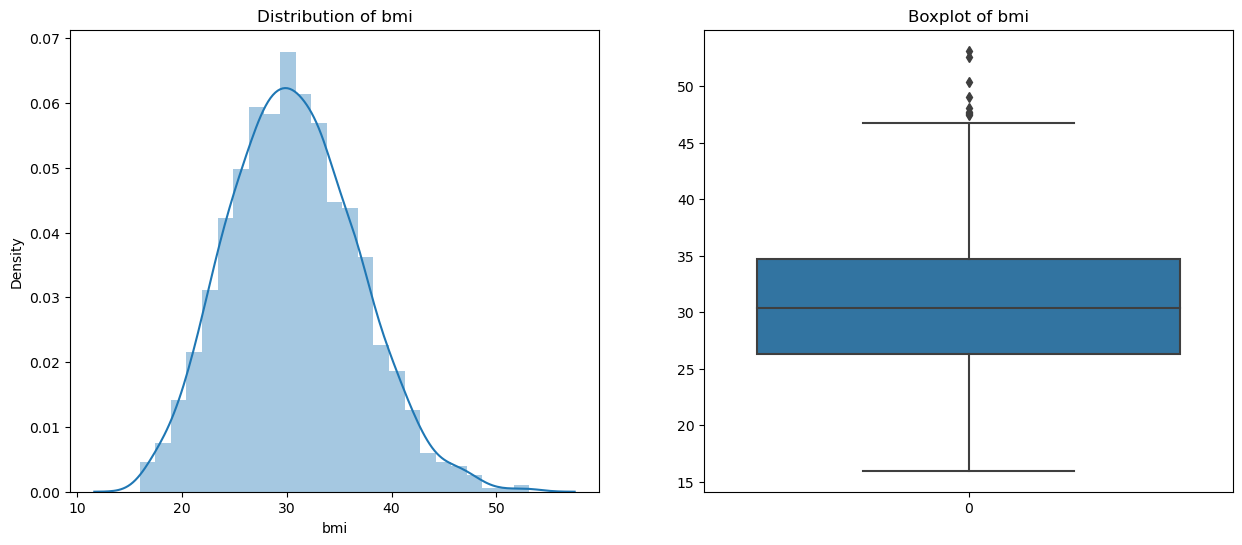

In [20]:
plt.figure(figsize=(15,6))
plt.subplot(1,2,1)
sns.distplot(df['bmi'])
plt.title('Distribution of bmi')

plt.subplot(1,2,2)
sns.boxplot(df['bmi'])
plt.title('Boxplot of bmi')

plt.show()

#### Observation: normal distribution, with few outliers above quantile 3

In [21]:
# Outlier values:
# Q3 + 1.5 * (Q3 -Q1)
Q3 = df['bmi'].quantile(0.75)
Q1 = df['bmi'].quantile(0.25)
Outlier =  Q3 + 1.5 * (Q3 -Q1)
print(Outlier)

47.31500000000001


In [22]:
df[df['bmi'] > Outlier]['bmi']

116     49.06
286     48.07
401     47.52
543     47.41
847     50.38
860     47.60
1047    52.58
1088    47.74
1317    53.13
Name: bmi, dtype: float64

In [23]:
##Analysis on children feature
df['children'].value_counts()

0    573
1    324
2    240
3    157
4     25
5     18
Name: children, dtype: int64

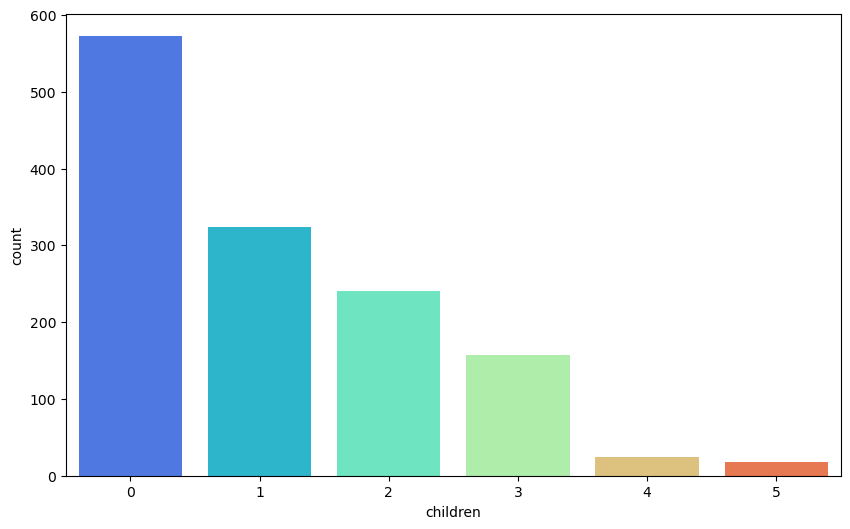

In [24]:
plt.figure(figsize=(10,6))
sns.countplot(x=df['children'], palette='rainbow')
plt.show()

In [25]:
## Analysis on smoker feature

df['smoker'].value_counts()

no     1063
yes     274
Name: smoker, dtype: int64

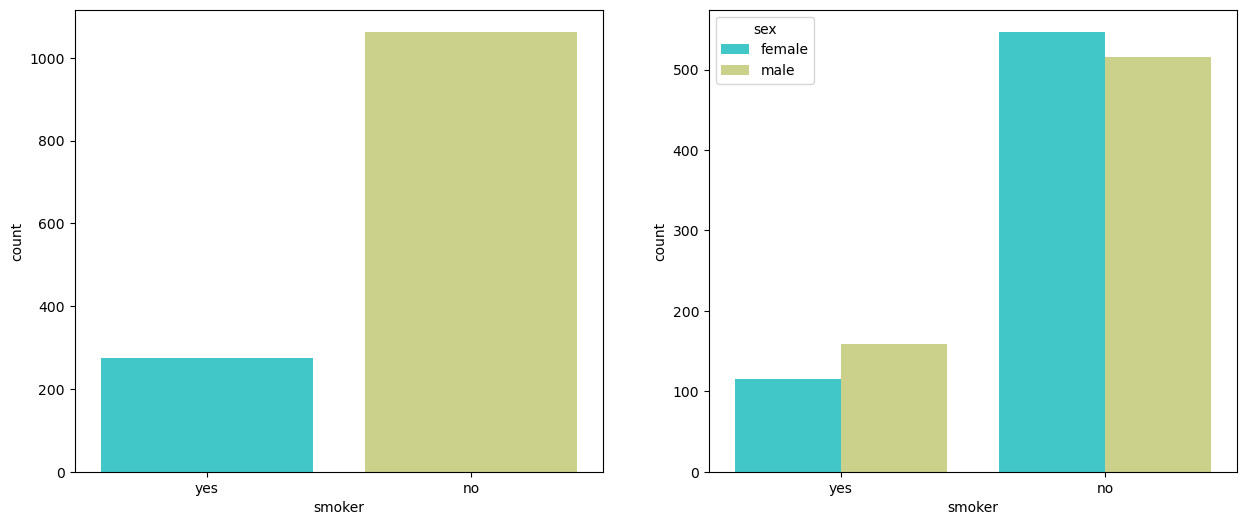

In [28]:
plt.figure(figsize=(15,6))
plt.subplot(1,2,1)
sns.countplot(x=df['smoker'], palette='rainbow')


plt.subplot(1,2,2)
sns.countplot(x=df['smoker'], hue=df['sex'], palette='rainbow')
plt.show()

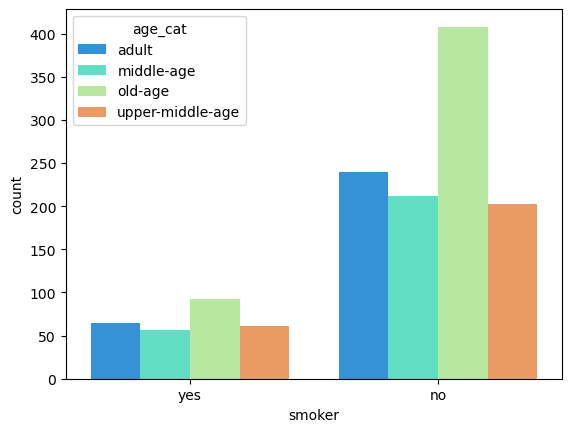

In [29]:
sns.countplot(x=df['smoker'], hue=df['age_cat'], palette='rainbow')
plt.show()

In [30]:
# Analysis on region feature

df['region'].value_counts()

southeast    364
southwest    325
northwest    324
northeast    324
Name: region, dtype: int64

<Axes: xlabel='region', ylabel='count'>

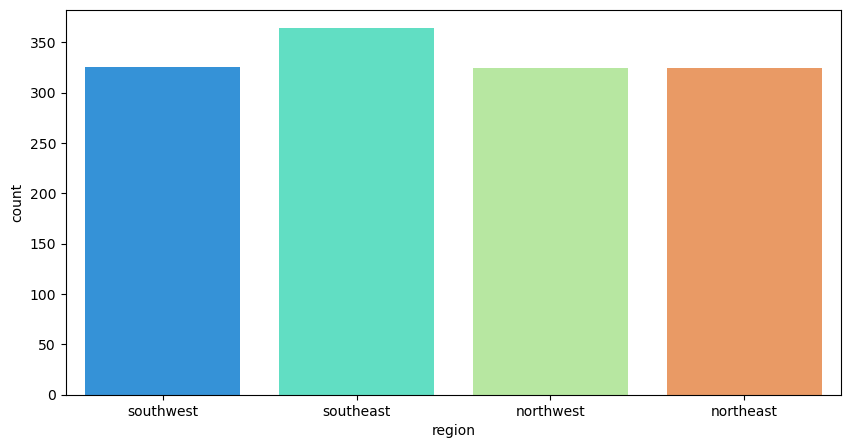

In [32]:
plt.figure(figsize=(10,5))
sns.countplot(x=df['region'], palette='rainbow')

<Axes: xlabel='region', ylabel='count'>

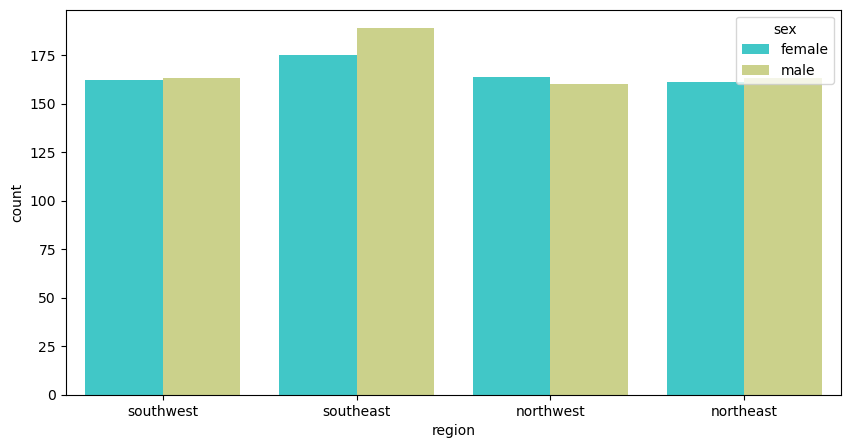

In [34]:
plt.figure(figsize=(10,5))
sns.countplot(x=df['region'], hue=df['sex'], palette='rainbow')

<Axes: xlabel='region', ylabel='count'>

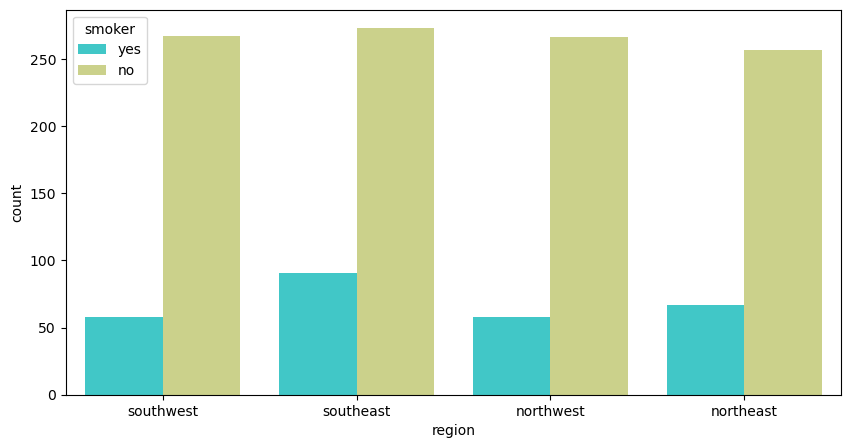

In [38]:
plt.figure(figsize=(10,5))
sns.countplot(x=df['region'], hue=df['smoker'], palette='rainbow')

In [39]:
## Analysis on target feature-charges

df['charges'].describe()

count     1337.000000
mean     13279.121487
std      12110.359656
min       1121.873900
25%       4746.344000
50%       9386.161300
75%      16657.717450
max      63770.428010
Name: charges, dtype: float64

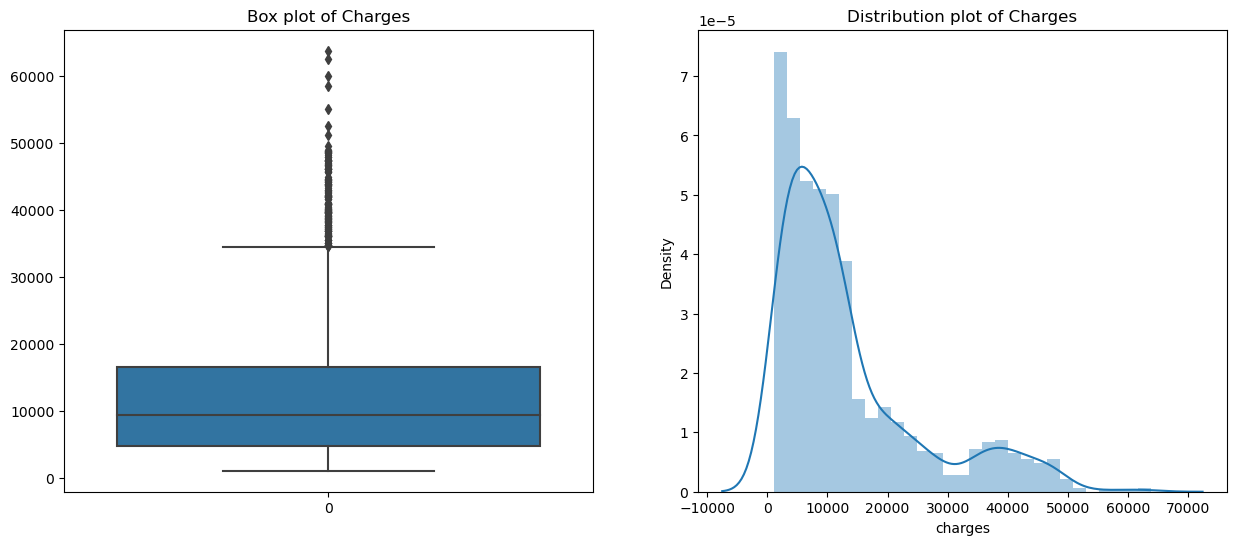

In [43]:
plt.figure(figsize=(15,6))
plt.subplot(1,2,1)
sns.boxplot(df['charges'])
plt.title('Box plot of Charges')

plt.subplot(1,2,2)
sns.distplot(df['charges'], kde=True)
plt.title('Distribution plot of Charges')

plt.show()

In [44]:
df['charges'].skew()

1.5153909108403483

In [45]:
# Outlier values:
# Q3 + 1.5 * (Q3 -Q1)
Q3 = df['charges'].quantile(0.75)
Q1 = df['charges'].quantile(0.25)
Outlier =  Q3 + 1.5 * (Q3 -Q1)
print(Outlier)

34524.777625


In [46]:
df[df['charges']> Outlier]

,age,sex,bmi,children,smoker,region,charges,age_cat
14,27,male,42.130,0,yes,southeast,39611.75770,middle-age
19,30,male,35.300,0,yes,southwest,36837.46700,middle-age
23,34,female,31.920,1,yes,northeast,37701.87680,middle-age
29,31,male,36.300,2,yes,southwest,38711.00000,middle-age
30,22,male,35.600,0,yes,southwest,35585.57600,adult
...,...,...,...,...,...,...,...,...
1300,45,male,30.360,0,yes,southeast,62592.87309,upper-middle-age
1301,62,male,30.875,3,yes,northwest,46718.16325,old-age
1303,43,male,27.800,0,yes,southwest,37829.72420,upper-middle-age
1313,19,female,34.700,2,yes,southwest,36397.57600,adult


In [47]:
df[df['charges']> Outlier]['smoker'].value_counts()

yes    136
no       3
Name: smoker, dtype: int64

In [49]:
df[df['charges']> Outlier][['sex', 'smoker']].value_counts()

sex     smoker
male    yes       89
female  yes       47
        no         3
dtype: int64

In [52]:
df[(df['charges']> Outlier) & (df['smoker']=='no')]

,age,sex,bmi,children,smoker,region,charges,age_cat
242,55,female,26.80,1,no,southwest,35160.13457,old-age
1012,61,female,33.33,4,no,southeast,36580.28216,old-age
1206,59,female,34.80,2,no,southwest,36910.60803,old-age


In [53]:
df[(df['charges']> Outlier) & (df['smoker']=='yes')]['region'].value_counts()

southeast    56
southwest    32
northeast    28
northwest    20
Name: region, dtype: int64

In [54]:
df[(df['charges']> Outlier) & (df['smoker']=='yes')]['age_cat'].value_counts()

old-age             52
upper-middle-age    34
middle-age          25
adult               25
Name: age_cat, dtype: int64

### Multi-variate Analysis

In [56]:
corr_mat=df.corr()

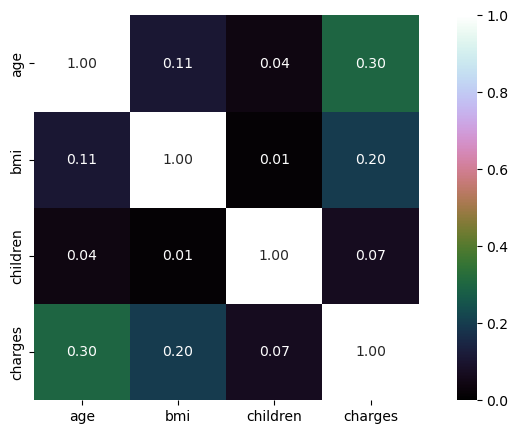

In [75]:
plt.figure(figsize=(10,5))
sns.heatmap(corr_mat, cmap='cubehelix', vmin=0, vmax =1, fmt='.2f',annot=True, square=True)
plt.show()

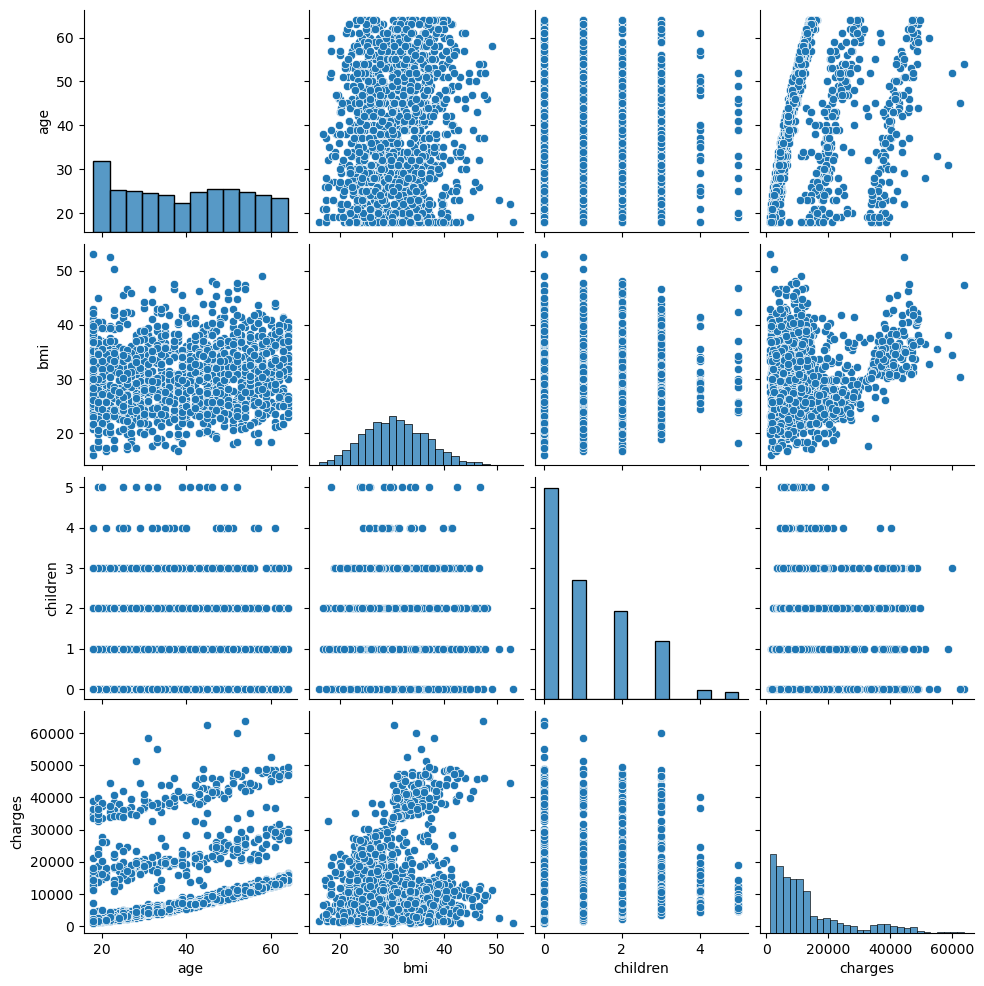

In [74]:
sns.pairplot(df, palette='rainbow')
plt.show()

### Data Pre-Processing

In [76]:
# We do not have features which are highly correlated
# since age is converted to categorical column, we are dropping age feature from data frame.

In [78]:
# taking backup before dropping feature from dataframe
df_original= df.copy()
df_original.shape

(1337, 8)

In [79]:
#Dropping feature age from dataframe
df.drop(['age'], axis=1, inplace=True)

In [80]:
df.shape

(1337, 7)

### Splitting the data into train & test sets

In [ ]:
import os
o